In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_carox_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CaryophylleneOxide
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.0
4,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
59996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
59997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
59998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..CaryophylleneOxide', 'index'], axis = 1)
y = df_knn[['X..CaryophylleneOxide']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

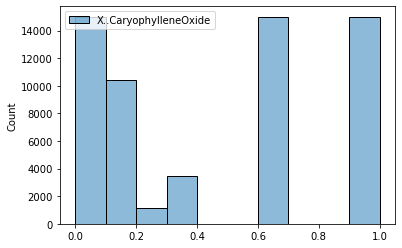

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.053899246031746034

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.023524867309145894

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.15337818394134772

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.913268961542996

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8457852920496073

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([8.75558698e-02, 9.53331165e-02, 1.02225300e-01, 1.42648027e-01,
       1.14821510e-01, 2.28933610e-01, 3.78158147e-04, 2.05424386e-04,
       1.10575347e-04, 1.98444955e-03, 4.06397917e-03, 0.00000000e+00,
       9.30205209e-03, 1.40817669e-04, 2.45408327e-03, 8.20300985e-03,
       6.38276431e-03, 6.53404123e-03, 0.00000000e+00, 2.77400220e-02,
       0.00000000e+00, 0.00000000e+00, 7.02327678e-03, 5.87591726e-03,
       7.76450496e-03, 2.10909698e-03, 6.14720329e-03, 1.42792501e-04,
       0.00000000e+00, 1.38680580e-03, 1.12200207e-02, 0.00000000e+00,
       7.82348166e-03, 0.00000000e+00, 2.08323288e-05, 6.47499580e-03,
       4.12653163e-03, 7.53939151e-03, 2.59606026e-04, 1.89807197e-04,
       4.75961879e-06, 1.88655125e-03, 1.28413817e-05, 1.98228451e-03,
       2.97581274e-04, 2.30690843e-03, 1.04297753e-03, 4.15015527e-04,
       3.86530640e-03, 2.09259414e-04, 8.79213571e-03, 7.00468294e-03,
       2.18729527e-03, 3.42672859e-04, 1.30434121e-03, 2.12970803e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,euphoric
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1
1,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0
2,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0
3,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,1
4,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,1
...,...,...,...,...,...,...,...
59995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,0
59996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1
59997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0
59998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1


In [24]:
selected_X.columns.to_list()

['lsa_0', 'lsa_1', 'lsa_2', 'lsa_3', 'lsa_4', 'hybrid', 'euphoric']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_carox.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_carox.pkl")

['selector_knn_lsa_elbow_carox.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.05338205191798943

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.021091024587033904

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.14522749253166187

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9129275831124253

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8615429016660059

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03225028695924099

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.12188888040526183

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9798471257343775

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9024683158308126

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_carox.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_carox.pkl")

['y_test_knreg_lsa_elbow_carox.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03343514246087743

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.015683724998549902

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12523467969596083

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8977425827295059

In [65]:
y_test

,X..CaryophylleneOxide
15281,1.000000
21435,0.666667
44536,0.666667
13518,1.000000
47529,0.666667
...,...
6636,1.000000
25027,0.000000
8294,1.000000
16607,1.000000


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

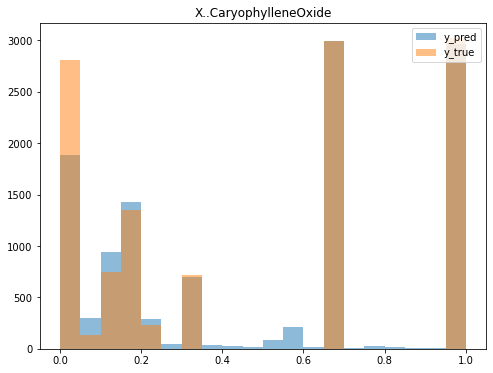

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CaryophylleneOxide"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_carox.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.949
P-value: 0.000


<AxesSubplot:>

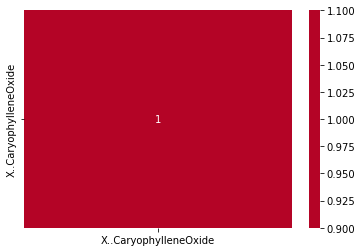

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)